In [1]:
import torch
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

# custom functions and classes
from simple_mnist import Model, train, evaluate

### Step 1:Load the train and test data

In [2]:
transf = transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.1307,), (0.3081,))])

trainvalset = datasets.MNIST(root='./data', train=True, download=True, transform=transf)

# Split train data into train and validation set
train_size = int(len(trainvalset) * 0.8)
val_size = len(trainvalset) - train_size
trainset, valset = torch.utils.data.random_split(trainvalset, [train_size, val_size])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transf)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)

### Step 2:  Let's visualize the MNIST data!

Example data size: torch.Size([1000, 1, 28, 28])


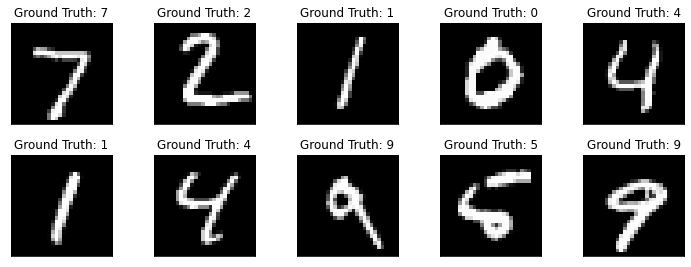

In [3]:
examples = iter(testloader)
example_data, example_targets = examples.next()

print("Example data size:", example_data.shape)

fig = plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

### Step 3: Load CNN model

In [4]:
model = Model()
model.to("cuda") # load to GPU

Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### Step 4: Define optimizer

In [5]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

### Step 5: Train the network

In [ ]:
train_losses = []
for epoch in range(5):
    losses = train(model, trainloader, optimizer, epoch)
    train_losses = train_losses + losses
    test_loss, test_accuracy = evaluate(model, testloader)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {test_accuracy:.1f}%\n")

plt.figure(figsize=(7,5))
plt.plot(train_losses)
plt.xlabel("Iterations")
plt.ylabel("Train loss")
plt.show()

### Step 6: Visualize the trained network predictions

In [ ]:
model.eval()

with torch.no_grad():
    output = model(example_data.to("cuda"))

fig = plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
plt.show()

### Step 7: Save the trained parameters

In [ ]:
torch.save(model.state_dict(), "mnist_cnn.pt")